# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### Imports and Constants

In [ ]:
import numpy as np
import glob

import matplotlib.pyplot as plt

IMAGES_PATH = "./images"
WEIGHTS_PATH = "./coefs.npy"
BIAS_PATH = "./bias.npy"
INITIAL_SHAPE = None

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [34]:
def load_images(path: str) -> np.ndarray:
    global INITIAL_SHAPE
    
    filelist = glob.glob(f"{path}/*.png")
    INITIAL_SHAPE = plt.imread(filelist[0]).shape

    return np.array([plt.imread(file).flatten() / 255.0 for file in filelist])

images = load_images(IMAGES_PATH)
print(images.shape)

(8, 12288)


### 2. Compute the mean of the images. 

In [31]:
images_mean = np.mean(images)
print(images_mean)

0.001730818


### 3. Normalize the images by subtracting the mean from each image.

In [10]:
images_norm = images - images_mean

### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [22]:
W = np.load(WEIGHTS_PATH)
b = np.load(BIAS_PATH)

def softmax(x: np.ndarray) -> np.ndarray:
    exp = np.exp(x)
    return exp / np.sum(exp, axis=-1, keepdims=True)

y_hat = softmax(images @ W + b)
predicted_labels = np.argmax(y_hat, axis=1)
print(y_hat)
print(predicted_labels)

[[0.52968754 0.25664264 0.16070801 0.05296181]
 [0.55040363 0.2638352  0.1443186  0.04144257]
 [0.34538472 0.46804831 0.14798534 0.03858163]
 [0.35279599 0.4633906  0.14889703 0.03491637]
 [0.39514808 0.33374585 0.22002565 0.05108042]
 [0.44640741 0.25429352 0.2577715  0.04152757]
 [0.40603708 0.3266541  0.16488108 0.10242774]
 [0.38287915 0.32199996 0.24432784 0.05079305]]
[0 0 1 1 0 0 0 0]


### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [24]:
ground_truths = np.array([0, 0, 1, 1, 2, 2, 3, 3])

def accuracy_score(ground_truths: np.ndarray, predictions: np.ndarray) -> float:
    return np.sum(ground_truths == predictions) / ground_truths.shape[0]

score = accuracy_score(ground_truths, predicted_labels)
print(score)

0.5


### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [28]:
class_label_map = {
    0: "Cat",
    1: "Dog",
    2: "Frog",
    3: "Horse",
}

for index, prediction in enumerate(predicted_labels):
    print(f"Prediction {index+1:02}: {class_label_map[prediction]}")

Prediction 01: Cat
Prediction 02: Cat
Prediction 03: Dog
Prediction 04: Dog
Prediction 05: Cat
Prediction 06: Cat
Prediction 07: Cat
Prediction 08: Cat


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

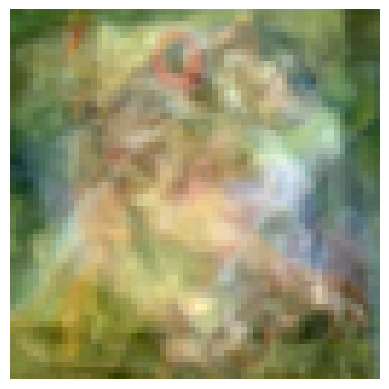

In [50]:
mean_image = np.mean(images_norm, axis=0)

# scale to [0,1] range
mean_image_shifted = mean_image - mean_image.min()  
mean_image_scaled = mean_image_shifted / mean_image_shifted.max()

# now to [0, 255]
mean_image = mean_image_scaled * 255.0
# type and shape
mean_image = mean_image.astype(np.uint8).reshape(INITIAL_SHAPE)

plt.imshow(mean_image)
plt.axis("off")
plt.show()